In [1]:
#panggil library 
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense
from tensorflow.keras.layers import Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
        
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import pandas as pd
import numpy as np
import os as os
import cv2
import random
import math
import itertools

from pyproj import Proj, transform
from tqdm import tqdm
from shapely.geometry import Polygon

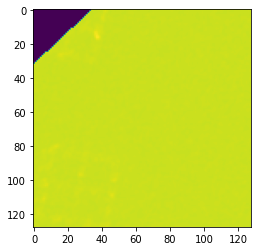

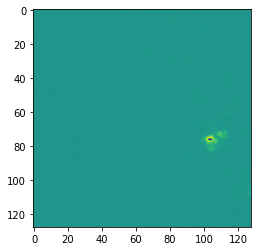

[[520 531 515 ... 568 495 493]
 [618 615 544 ... 483 434 454]
 [597 540 437 ... 497 473 460]
 ...
 [383 400 538 ... 534 504 449]
 [543 458 451 ... 596 519 437]
 [698 604 615 ... 655 495 389]]


NameError: name 'NKJA' is not defined

In [32]:
from osgeo import gdal
test_folder="D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/Training"
Categories=["NKJA", "KJA"]

for category in Categories:
    path = os.path.join(test_folder, category)
    for img in os.listdir(path):
        img_array = gdal.Open(os.path.join(path, img)).ReadAsArray()
        plt.imshow(img_array)
        plt.show()
        break
        break

print(img_array)
img_array.shape

In [19]:
training_data = []
def create_training_data():
    for category in Categories:
        path = os.path.join(test_folder,category) # create path to dogs and cats
        class_num = Categories.index(category) # get the classification (0 or a 1). 0=nkja 1=kja
        for img in tqdm(os.listdir(path)): # iterate over each image per nkja and kja
            try:
                img_array = gdal.Open(os.path.join(path,img)).ReadAsArray() # convert to array
                img_array = np.rollaxis(img_array, 0, 1)
                #array_sum = np.sum(img_array)
                #array_has_nan = np.isnan(array_sum)
                #img_array = img_array.reshape(-1, 32, 32, 1)
                #new_array = cv2.resize(img_array, (32, 32, 1)) # resize to normalize data size
                if img_array.shape==(128,128):
                    training_data.append([img_array, class_num]) # add this to our training_data
            except Exception as e: # in the interest in keeping the output clean...
                pass
                    #except OSError as e:
                    # print("OSErrroBad img most likely", e, os.path.join(path,img))
                    #except Exception as e:
                    # print("general exception", e, os.path.join(path,img))
                    
create_training_data()
print(len(training_data))


100%|███████████████████████████████████████████████████████████████████████████████| 265/265 [00:01<00:00, 206.56it/s]

897


In [21]:
import random
random.shuffle(training_data)
    
for sample in training_data[:10]:
    print(sample[1])


0
0
0
0
1
0
0
1
0
1


In [23]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X)
X.shape
print (X.shape)

(897, 128, 128)


In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

#model CNN 
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(128, 128, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D())
#model.add(Dropout(0.3))

model.add(Flatten())
#ann
model.add(Dense(256,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

y = np.array(y)
print(y)
history = model.fit(X, y, batch_size=100, epochs=100, validation_split = 0.3)


[0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 

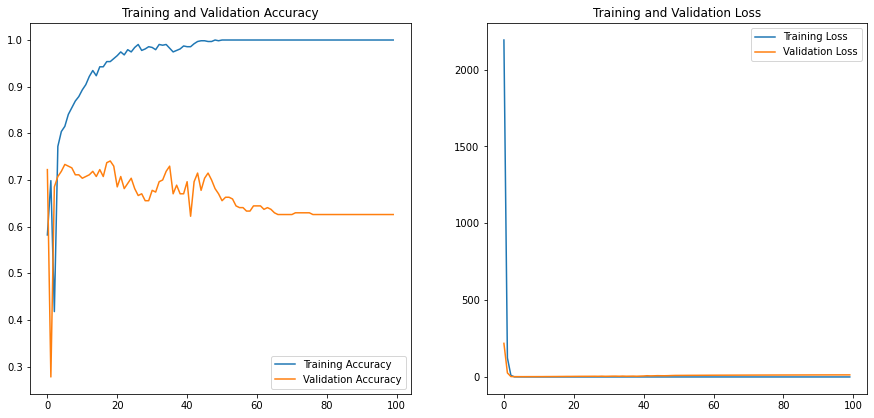

In [27]:
model.save("D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/testcnn_kja.h5")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(100)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [29]:
import os, os.path
imgs = []
path2 = "D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/test"
valid_images = [".tif"]
for f in os.listdir(path2):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(os.path.join(path2,f))
imgs

['D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/test\\test_1_16453_14_128.tif',
 'D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/test\\test_1_16454_15_128.tif',
 'D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/test\\test_1_16455_16_128.tif',
 'D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/test\\test_1_16456_17_128.tif',
 'D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/test\\test_1_16457_18_128.tif',
 'D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/test\\test_1_16461_22_128.tif',
 'D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/test\\test_1_16661_45_128.tif',
 'D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/test\\test_1_16662_46_128.tif',
 'D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/test\\test_1_16663_47_128.tif',
 'D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/test\\test_1_16664_48_

In [33]:
import pandas as pd 
import numpy as np
from keras.models import load_model

model2 = load_model("testcnn_kja.h5")

outcome = []
for k in tqdm(imgs):
    img = gdal.Open(k).ReadAsArray()
    #img = (img - np.min(X))/np.ptp(X)
    #img = np.reshape(img,[1,128,128,1])
    img = np.rollaxis(img, 0, 1)
    if img.shape==(128,128):
        name = k
        img = np.reshape(img,[1,128,128,1])
        status = model.predict(img)
        status = status.tolist()[0]
        status = float(status[0])
        outcome.append([status, name])
df = pd.DataFrame(outcome, columns = ['output', 'name'])
df

  0%|                                                                                          | 0/750 [00:00<?, ?it/s]

1/1 [==============================] - 0s 114ms/step


  0%|                                                                                  | 1/750 [00:00<01:54,  6.54it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▍                                                                                 | 4/750 [00:00<00:52, 14.33it/s]

1/1 [==============================] - 0s 19ms/step


  1%|▊                                                                                 | 7/750 [00:00<00:43, 17.14it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▉                                                                                 | 9/750 [00:00<00:41, 17.99it/s]

1/1 [==============================] - 0s 19ms/step


  1%|█▏                                                                               | 11/750 [00:00<00:40, 18.36it/s]

1/1 [==============================] - 0s 21ms/step


  2%|█▍                                                                               | 13/750 [00:00<00:40, 18.40it/s]

1/1 [==============================] - 0s 18ms/step


  2%|█▌                                                                               | 15/750 [00:00<00:39, 18.68it/s]

1/1 [==============================] - 0s 18ms/step


  2%|█▉                                                                               | 18/750 [00:01<00:37, 19.35it/s]

1/1 [==============================] - 0s 18ms/step


  3%|██▎                                                                              | 21/750 [00:01<00:37, 19.69it/s]

1/1 [==============================] - 0s 18ms/step


  3%|██▌                                                                              | 24/750 [00:01<00:36, 19.83it/s]

1/1 [==============================] - 0s 20ms/step


  4%|██▉                                                                              | 27/750 [00:01<00:36, 19.98it/s]

1/1 [==============================] - 0s 18ms/step


  4%|███▏                                                                             | 29/750 [00:01<00:36, 19.53it/s]

1/1 [==============================] - 0s 20ms/step


  4%|███▎                                                                             | 31/750 [00:01<00:36, 19.56it/s]

1/1 [==============================] - 0s 22ms/step


  4%|███▌                                                                             | 33/750 [00:01<00:37, 19.22it/s]

1/1 [==============================] - 0s 19ms/step


  5%|███▊                                                                             | 35/750 [00:01<00:37, 19.00it/s]

1/1 [==============================] - 0s 16ms/step


  5%|███▉                                                                             | 37/750 [00:01<00:37, 18.80it/s]

1/1 [==============================] - 0s 19ms/step


  5%|████▏                                                                            | 39/750 [00:02<00:37, 19.00it/s]

1/1 [==============================] - 0s 20ms/step


  5%|████▍                                                                            | 41/750 [00:02<00:37, 19.01it/s]

1/1 [==============================] - 0s 19ms/step


  6%|████▋                                                                            | 43/750 [00:02<00:38, 18.60it/s]

1/1 [==============================] - 0s 21ms/step


  6%|████▊                                                                            | 45/750 [00:02<00:38, 18.37it/s]

1/1 [==============================] - 0s 20ms/step


  6%|█████                                                                            | 47/750 [00:02<00:38, 18.39it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████▎                                                                           | 49/750 [00:02<00:38, 18.32it/s]

1/1 [==============================] - 0s 20ms/step


  7%|█████▌                                                                           | 51/750 [00:02<00:38, 18.37it/s]

1/1 [==============================] - 0s 19ms/step


  7%|█████▋                                                                           | 53/750 [00:02<00:37, 18.37it/s]

1/1 [==============================] - 0s 21ms/step


  7%|█████▉                                                                           | 55/750 [00:02<00:38, 18.16it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████▏                                                                          | 57/750 [00:03<00:39, 17.75it/s]

1/1 [==============================] - 0s 20ms/step


  8%|██████▍                                                                          | 60/750 [00:03<00:37, 18.16it/s]

1/1 [==============================] - 0s 19ms/step


  8%|██████▋                                                                          | 62/750 [00:03<00:38, 17.99it/s]

1/1 [==============================] - 0s 22ms/step


  9%|██████▉                                                                          | 64/750 [00:03<00:38, 18.02it/s]

1/1 [==============================] - 0s 20ms/step


  9%|███████▏                                                                         | 66/750 [00:03<00:38, 17.91it/s]

1/1 [==============================] - 0s 21ms/step


  9%|███████▎                                                                         | 68/750 [00:03<00:37, 18.43it/s]

1/1 [==============================] - 0s 20ms/step


  9%|███████▌                                                                         | 70/750 [00:03<00:36, 18.58it/s]

1/1 [==============================] - 0s 19ms/step


 10%|███████▉                                                                         | 73/750 [00:03<00:34, 19.47it/s]

1/1 [==============================] - 0s 16ms/step


 10%|████████▏                                                                        | 76/750 [00:04<00:35, 18.90it/s]

1/1 [==============================] - 0s 19ms/step


 11%|████████▌                                                                        | 79/750 [00:04<00:34, 19.44it/s]

1/1 [==============================] - 0s 19ms/step


 11%|████████▊                                                                        | 82/750 [00:04<00:33, 19.75it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█████████▏                                                                       | 85/750 [00:04<00:32, 20.29it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█████████▌                                                                       | 88/750 [00:05<01:01, 10.73it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█████████▋                                                                       | 90/750 [00:05<00:56, 11.72it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████▉                                                                       | 92/750 [00:05<00:53, 12.24it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▏                                                                      | 94/750 [00:05<00:48, 13.44it/s]

1/1 [==============================] - 0s 19ms/step


 13%|██████████▎                                                                      | 96/750 [00:05<00:44, 14.59it/s]

1/1 [==============================] - 0s 20ms/step


 13%|██████████▌                                                                      | 98/750 [00:05<00:42, 15.50it/s]

1/1 [==============================] - 0s 18ms/step


 13%|██████████▊                                                                     | 101/750 [00:05<00:37, 17.49it/s]

1/1 [==============================] - 0s 18ms/step


 14%|███████████                                                                     | 104/750 [00:05<00:34, 18.87it/s]

1/1 [==============================] - 0s 19ms/step


 14%|███████████▎                                                                    | 106/750 [00:06<00:33, 19.01it/s]

1/1 [==============================] - 0s 22ms/step


 14%|███████████▌                                                                    | 108/750 [00:06<00:34, 18.61it/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▋                                                                    | 110/750 [00:06<00:34, 18.66it/s]

1/1 [==============================] - 0s 20ms/step


 15%|████████████                                                                    | 113/750 [00:06<00:32, 19.44it/s]

1/1 [==============================] - 0s 18ms/step


 15%|████████████▎                                                                   | 116/750 [00:06<00:31, 20.39it/s]

1/1 [==============================] - 0s 19ms/step


 16%|████████████▋                                                                   | 119/750 [00:06<00:30, 20.82it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█████████████                                                                   | 122/750 [00:06<00:29, 21.10it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█████████████▎                                                                  | 125/750 [00:06<00:30, 20.28it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█████████████▋                                                                  | 128/750 [00:07<00:30, 20.52it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█████████████▉                                                                  | 131/750 [00:07<00:30, 20.25it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▎                                                                 | 134/750 [00:07<00:32, 19.15it/s]

1/1 [==============================] - 0s 20ms/step


 18%|██████████████▌                                                                 | 136/750 [00:07<00:31, 19.32it/s]

1/1 [==============================] - 0s 24ms/step


 18%|██████████████▋                                                                 | 138/750 [00:07<00:33, 18.29it/s]

1/1 [==============================] - 0s 21ms/step


 19%|██████████████▉                                                                 | 140/750 [00:07<00:34, 17.74it/s]

1/1 [==============================] - 0s 22ms/step


 19%|███████████████▏                                                                | 142/750 [00:07<00:34, 17.81it/s]

1/1 [==============================] - 0s 19ms/step


 19%|███████████████▎                                                                | 144/750 [00:08<00:33, 18.23it/s]

1/1 [==============================] - 0s 43ms/step


 19%|███████████████▌                                                                | 146/750 [00:08<00:34, 17.41it/s]

1/1 [==============================] - 0s 17ms/step


 20%|███████████████▊                                                                | 148/750 [00:08<00:33, 17.93it/s]

1/1 [==============================] - 0s 19ms/step


 20%|████████████████                                                                | 151/750 [00:08<00:31, 19.31it/s]

1/1 [==============================] - 0s 18ms/step


 21%|████████████████▍                                                               | 154/750 [00:08<00:29, 20.03it/s]

1/1 [==============================] - 0s 22ms/step


 21%|████████████████▋                                                               | 157/750 [00:08<00:28, 20.50it/s]

1/1 [==============================] - 0s 19ms/step


 21%|█████████████████                                                               | 160/750 [00:08<00:30, 19.51it/s]

1/1 [==============================] - 0s 20ms/step


 22%|█████████████████▍                                                              | 163/750 [00:08<00:29, 19.99it/s]

1/1 [==============================] - 0s 21ms/step


 22%|█████████████████▋                                                              | 166/750 [00:09<00:29, 19.79it/s]

1/1 [==============================] - 0s 19ms/step


 22%|█████████████████▉                                                              | 168/750 [00:09<00:30, 19.26it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██████████████████▏                                                             | 171/750 [00:09<00:29, 19.89it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██████████████████▌                                                             | 174/750 [00:09<00:28, 20.03it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██████████████████▉                                                             | 177/750 [00:09<00:28, 20.10it/s]

1/1 [==============================] - 0s 20ms/step


 24%|███████████████████▏                                                            | 180/750 [00:09<00:28, 20.13it/s]

1/1 [==============================] - 0s 20ms/step


 24%|███████████████████▌                                                            | 183/750 [00:09<00:28, 20.05it/s]

1/1 [==============================] - 0s 12ms/step


 25%|███████████████████▊                                                            | 186/750 [00:10<00:26, 21.01it/s]

1/1 [==============================] - 0s 21ms/step


 25%|████████████████████▏                                                           | 189/750 [00:10<00:27, 20.36it/s]

1/1 [==============================] - 0s 22ms/step


 26%|████████████████████▍                                                           | 192/750 [00:10<00:27, 20.20it/s]

1/1 [==============================] - 0s 19ms/step


 26%|████████████████████▊                                                           | 195/750 [00:10<00:27, 20.45it/s]

1/1 [==============================] - 0s 14ms/step


 26%|█████████████████████                                                           | 198/750 [00:10<00:26, 21.09it/s]

1/1 [==============================] - 0s 18ms/step


 27%|█████████████████████▍                                                          | 201/750 [00:10<00:26, 20.81it/s]

1/1 [==============================] - 0s 18ms/step


 27%|█████████████████████▊                                                          | 204/750 [00:11<00:27, 20.07it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██████████████████████                                                          | 207/750 [00:11<00:26, 20.48it/s]

1/1 [==============================] - 0s 11ms/step


 28%|██████████████████████▍                                                         | 210/750 [00:11<00:26, 20.63it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██████████████████████▋                                                         | 213/750 [00:11<00:25, 21.00it/s]

1/1 [==============================] - 0s 17ms/step


 29%|███████████████████████                                                         | 216/750 [00:11<00:25, 21.17it/s]

1/1 [==============================] - 0s 19ms/step


 29%|███████████████████████▎                                                        | 219/750 [00:11<00:25, 21.09it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███████████████████████▋                                                        | 222/750 [00:11<00:26, 20.30it/s]

1/1 [==============================] - 0s 16ms/step


 30%|████████████████████████                                                        | 225/750 [00:12<00:26, 19.56it/s]

1/1 [==============================] - 0s 12ms/step


 30%|████████████████████████▎                                                       | 228/750 [00:12<00:25, 20.60it/s]

1/1 [==============================] - 0s 18ms/step


 31%|████████████████████████▋                                                       | 231/750 [00:12<00:25, 20.45it/s]

1/1 [==============================] - 0s 26ms/step


 31%|████████████████████████▉                                                       | 234/750 [00:12<00:27, 19.02it/s]

1/1 [==============================] - 0s 19ms/step


 31%|█████████████████████████▏                                                      | 236/750 [00:12<00:27, 19.00it/s]

1/1 [==============================] - 0s 11ms/step


 32%|█████████████████████████▍                                                      | 239/750 [00:12<00:25, 20.22it/s]

1/1 [==============================] - 0s 16ms/step


 32%|█████████████████████████▊                                                      | 242/750 [00:12<00:25, 20.15it/s]

1/1 [==============================] - 0s 13ms/step


 33%|██████████████████████████▏                                                     | 245/750 [00:13<00:24, 20.83it/s]

1/1 [==============================] - 0s 18ms/step


 33%|██████████████████████████▍                                                     | 248/750 [00:13<00:25, 19.87it/s]

1/1 [==============================] - 0s 17ms/step


 33%|██████████████████████████▊                                                     | 251/750 [00:13<00:24, 20.15it/s]

1/1 [==============================] - 0s 20ms/step


 34%|███████████████████████████                                                     | 254/750 [00:13<00:24, 20.25it/s]

1/1 [==============================] - 0s 18ms/step


 34%|███████████████████████████▍                                                    | 257/750 [00:13<00:24, 20.44it/s]

1/1 [==============================] - 0s 19ms/step


 35%|███████████████████████████▋                                                    | 260/750 [00:13<00:23, 20.54it/s]

1/1 [==============================] - 0s 17ms/step


 35%|████████████████████████████                                                    | 263/750 [00:13<00:23, 20.59it/s]

1/1 [==============================] - 0s 19ms/step


 35%|████████████████████████████▎                                                   | 266/750 [00:14<00:23, 20.93it/s]

1/1 [==============================] - 0s 17ms/step


 36%|████████████████████████████▋                                                   | 269/750 [00:14<00:22, 21.17it/s]

1/1 [==============================] - 0s 19ms/step


 36%|█████████████████████████████                                                   | 272/750 [00:14<00:22, 20.95it/s]

1/1 [==============================] - 0s 21ms/step


 37%|█████████████████████████████▎                                                  | 275/750 [00:14<00:22, 21.13it/s]

1/1 [==============================] - 0s 20ms/step


 37%|█████████████████████████████▋                                                  | 278/750 [00:14<00:22, 20.91it/s]

1/1 [==============================] - 0s 18ms/step


 37%|█████████████████████████████▉                                                  | 281/750 [00:14<00:22, 21.30it/s]

1/1 [==============================] - 0s 15ms/step


 38%|██████████████████████████████▎                                                 | 284/750 [00:14<00:21, 21.65it/s]

1/1 [==============================] - 0s 12ms/step


 38%|██████████████████████████████▌                                                 | 287/750 [00:15<00:21, 21.89it/s]

1/1 [==============================] - 0s 19ms/step


 39%|██████████████████████████████▉                                                 | 290/750 [00:15<00:21, 21.29it/s]

1/1 [==============================] - 0s 12ms/step


 39%|███████████████████████████████▎                                                | 293/750 [00:15<00:21, 21.57it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███████████████████████████████▌                                                | 296/750 [00:15<00:21, 21.26it/s]

1/1 [==============================] - 0s 18ms/step


 40%|███████████████████████████████▉                                                | 299/750 [00:15<00:20, 21.49it/s]

1/1 [==============================] - 0s 18ms/step


 40%|████████████████████████████████▏                                               | 302/750 [00:15<00:22, 20.31it/s]

1/1 [==============================] - 0s 14ms/step


 41%|████████████████████████████████▌                                               | 305/750 [00:15<00:21, 20.92it/s]

1/1 [==============================] - 0s 11ms/step


 41%|████████████████████████████████▊                                               | 308/750 [00:16<00:20, 21.37it/s]

1/1 [==============================] - 0s 18ms/step


 41%|█████████████████████████████████▏                                              | 311/750 [00:16<00:20, 21.03it/s]

1/1 [==============================] - 0s 19ms/step


 42%|█████████████████████████████████▍                                              | 314/750 [00:16<00:20, 21.23it/s]

1/1 [==============================] - 0s 14ms/step


 42%|█████████████████████████████████▊                                              | 317/750 [00:16<00:21, 19.94it/s]

1/1 [==============================] - 0s 19ms/step


 43%|██████████████████████████████████▏                                             | 320/750 [00:16<00:21, 20.43it/s]

1/1 [==============================] - 0s 18ms/step


 43%|██████████████████████████████████▍                                             | 323/750 [00:16<00:20, 20.84it/s]

1/1 [==============================] - 0s 11ms/step


 43%|██████████████████████████████████▊                                             | 326/750 [00:16<00:19, 21.32it/s]

1/1 [==============================] - 0s 18ms/step


 44%|███████████████████████████████████                                             | 329/750 [00:17<00:20, 20.98it/s]

1/1 [==============================] - 0s 15ms/step


 44%|███████████████████████████████████▍                                            | 332/750 [00:17<00:19, 21.34it/s]

1/1 [==============================] - 0s 19ms/step


 45%|███████████████████████████████████▋                                            | 335/750 [00:17<00:19, 21.07it/s]

1/1 [==============================] - 0s 19ms/step


 45%|████████████████████████████████████                                            | 338/750 [00:17<00:19, 21.32it/s]

1/1 [==============================] - 0s 17ms/step


 45%|████████████████████████████████████▎                                           | 341/750 [00:17<00:19, 21.52it/s]

1/1 [==============================] - 0s 6ms/step


 46%|████████████████████████████████████▋                                           | 344/750 [00:17<00:20, 19.74it/s]

1/1 [==============================] - 0s 17ms/step


 46%|█████████████████████████████████████                                           | 347/750 [00:17<00:19, 20.30it/s]

1/1 [==============================] - 0s 19ms/step


 47%|█████████████████████████████████████▎                                          | 350/750 [00:18<00:19, 20.58it/s]

1/1 [==============================] - 0s 19ms/step


 47%|█████████████████████████████████████▋                                          | 353/750 [00:18<00:18, 20.97it/s]

1/1 [==============================] - 0s 19ms/step


 47%|█████████████████████████████████████▉                                          | 356/750 [00:18<00:18, 20.79it/s]

1/1 [==============================] - 0s 11ms/step


 48%|██████████████████████████████████████▎                                         | 359/750 [00:18<00:18, 21.08it/s]

1/1 [==============================] - 0s 18ms/step


 48%|██████████████████████████████████████▌                                         | 362/750 [00:18<00:18, 20.93it/s]

1/1 [==============================] - 0s 13ms/step


 49%|██████████████████████████████████████▉                                         | 365/750 [00:18<00:18, 21.24it/s]

1/1 [==============================] - 0s 19ms/step


 49%|███████████████████████████████████████▎                                        | 368/750 [00:18<00:18, 21.01it/s]

1/1 [==============================] - 0s 17ms/step


 49%|███████████████████████████████████████▌                                        | 371/750 [00:19<00:17, 21.29it/s]

1/1 [==============================] - 0s 11ms/step


 50%|███████████████████████████████████████▉                                        | 374/750 [00:19<00:17, 21.63it/s]

1/1 [==============================] - 0s 18ms/step


 50%|████████████████████████████████████████▏                                       | 377/750 [00:19<00:17, 21.11it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████████████████████████▌                                       | 380/750 [00:19<00:17, 21.51it/s]

1/1 [==============================] - 0s 17ms/step


 51%|████████████████████████████████████████▊                                       | 383/750 [00:19<00:17, 21.30it/s]

1/1 [==============================] - 0s 19ms/step


 51%|█████████████████████████████████████████▏                                      | 386/750 [00:19<00:17, 21.03it/s]

1/1 [==============================] - 0s 12ms/step


 52%|█████████████████████████████████████████▍                                      | 389/750 [00:19<00:16, 21.81it/s]

1/1 [==============================] - 0s 17ms/step


 52%|█████████████████████████████████████████▊                                      | 392/750 [00:20<00:16, 21.40it/s]

1/1 [==============================] - 0s 17ms/step


 53%|██████████████████████████████████████████▏                                     | 395/750 [00:20<00:16, 21.54it/s]

1/1 [==============================] - 0s 13ms/step


 53%|██████████████████████████████████████████▍                                     | 398/750 [00:20<00:16, 21.83it/s]

1/1 [==============================] - 0s 19ms/step


 53%|██████████████████████████████████████████▊                                     | 401/750 [00:20<00:16, 21.09it/s]

1/1 [==============================] - 0s 15ms/step


 54%|███████████████████████████████████████████                                     | 404/750 [00:20<00:16, 20.90it/s]

1/1 [==============================] - 0s 17ms/step


 54%|███████████████████████████████████████████▍                                    | 407/750 [00:20<00:16, 20.70it/s]

1/1 [==============================] - 0s 16ms/step


 55%|███████████████████████████████████████████▋                                    | 410/750 [00:20<00:16, 21.12it/s]

1/1 [==============================] - 0s 10ms/step


 55%|████████████████████████████████████████████                                    | 413/750 [00:21<00:16, 20.97it/s]

1/1 [==============================] - 0s 13ms/step


 55%|████████████████████████████████████████████▎                                   | 416/750 [00:21<00:15, 21.17it/s]

1/1 [==============================] - 0s 19ms/step


 56%|████████████████████████████████████████████▋                                   | 419/750 [00:21<00:15, 21.02it/s]

1/1 [==============================] - 0s 18ms/step


 56%|█████████████████████████████████████████████                                   | 422/750 [00:21<00:15, 21.26it/s]

1/1 [==============================] - 0s 12ms/step


 57%|█████████████████████████████████████████████▎                                  | 425/750 [00:21<00:15, 21.60it/s]

1/1 [==============================] - 0s 17ms/step


 57%|█████████████████████████████████████████████▋                                  | 428/750 [00:21<00:15, 21.10it/s]

1/1 [==============================] - 0s 15ms/step


 57%|█████████████████████████████████████████████▉                                  | 431/750 [00:21<00:14, 21.50it/s]

1/1 [==============================] - 0s 17ms/step


 58%|██████████████████████████████████████████████▎                                 | 434/750 [00:22<00:14, 21.26it/s]

1/1 [==============================] - 0s 18ms/step


 58%|██████████████████████████████████████████████▌                                 | 437/750 [00:22<00:14, 21.38it/s]

1/1 [==============================] - 0s 13ms/step


 59%|██████████████████████████████████████████████▉                                 | 440/750 [00:22<00:14, 21.70it/s]

1/1 [==============================] - 0s 19ms/step


 59%|███████████████████████████████████████████████▎                                | 443/750 [00:22<00:14, 21.10it/s]

1/1 [==============================] - 0s 13ms/step


 59%|███████████████████████████████████████████████▌                                | 446/750 [00:22<00:14, 21.56it/s]

1/1 [==============================] - 0s 17ms/step


 60%|███████████████████████████████████████████████▉                                | 449/750 [00:22<00:14, 21.07it/s]

1/1 [==============================] - 0s 16ms/step


 60%|████████████████████████████████████████████████▏                               | 452/750 [00:22<00:13, 21.47it/s]

1/1 [==============================] - 0s 11ms/step


 61%|████████████████████████████████████████████████▌                               | 455/750 [00:22<00:13, 21.77it/s]

1/1 [==============================] - 0s 19ms/step


 61%|████████████████████████████████████████████████▊                               | 458/750 [00:23<00:13, 21.15it/s]

1/1 [==============================] - 0s 14ms/step


 61%|█████████████████████████████████████████████████▏                              | 461/750 [00:23<00:13, 21.60it/s]

1/1 [==============================] - 0s 12ms/step


 62%|█████████████████████████████████████████████████▍                              | 464/750 [00:23<00:13, 21.69it/s]

1/1 [==============================] - 0s 18ms/step


 62%|█████████████████████████████████████████████████▊                              | 467/750 [00:23<00:13, 21.31it/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████████████████████████████████████████████████▏                             | 470/750 [00:23<00:13, 20.91it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████████████████████████████████████████████████▍                             | 473/750 [00:23<00:13, 21.27it/s]

1/1 [==============================] - 0s 13ms/step


 63%|██████████████████████████████████████████████████▊                             | 476/750 [00:23<00:12, 21.72it/s]

1/1 [==============================] - 0s 19ms/step


 64%|███████████████████████████████████████████████████                             | 479/750 [00:24<00:12, 21.14it/s]

1/1 [==============================] - 0s 16ms/step


 64%|███████████████████████████████████████████████████▍                            | 482/750 [00:24<00:12, 21.56it/s]

1/1 [==============================] - 0s 14ms/step


 65%|███████████████████████████████████████████████████▋                            | 485/750 [00:24<00:12, 21.72it/s]

1/1 [==============================] - 0s 6ms/step


 65%|████████████████████████████████████████████████████                            | 488/750 [00:24<00:12, 20.55it/s]

1/1 [==============================] - 0s 17ms/step


 65%|████████████████████████████████████████████████████▎                           | 491/750 [00:24<00:12, 20.38it/s]

1/1 [==============================] - 0s 16ms/step


 66%|████████████████████████████████████████████████████▋                           | 494/750 [00:24<00:12, 20.77it/s]

1/1 [==============================] - 0s 18ms/step


 66%|█████████████████████████████████████████████████████                           | 497/750 [00:24<00:12, 20.92it/s]

1/1 [==============================] - 0s 19ms/step


 67%|█████████████████████████████████████████████████████▎                          | 500/750 [00:25<00:11, 21.17it/s]

1/1 [==============================] - 0s 12ms/step


 67%|█████████████████████████████████████████████████████▋                          | 503/750 [00:25<00:11, 21.55it/s]

1/1 [==============================] - 0s 19ms/step


 67%|█████████████████████████████████████████████████████▉                          | 506/750 [00:25<00:11, 21.22it/s]

1/1 [==============================] - 0s 15ms/step


 68%|██████████████████████████████████████████████████████▎                         | 509/750 [00:25<00:11, 21.42it/s]

1/1 [==============================] - 0s 13ms/step


 68%|██████████████████████████████████████████████████████▌                         | 512/750 [00:25<00:10, 21.74it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████████████████████████████████████████████████████▉                         | 515/750 [00:25<00:11, 21.34it/s]

1/1 [==============================] - 0s 19ms/step


 69%|███████████████████████████████████████████████████████▎                        | 518/750 [00:25<00:10, 21.52it/s]

1/1 [==============================] - 0s 11ms/step


 69%|███████████████████████████████████████████████████████▌                        | 521/750 [00:26<00:10, 21.80it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████████████████████████████████▉                        | 524/750 [00:26<00:10, 22.00it/s]

1/1 [==============================] - 0s 18ms/step


 70%|████████████████████████████████████████████████████████▏                       | 527/750 [00:26<00:10, 21.21it/s]

1/1 [==============================] - 0s 15ms/step


 71%|████████████████████████████████████████████████████████▌                       | 530/750 [00:26<00:10, 21.41it/s]

1/1 [==============================] - 0s 19ms/step


 71%|████████████████████████████████████████████████████████▊                       | 533/750 [00:26<00:10, 21.26it/s]

1/1 [==============================] - 0s 19ms/step


 71%|█████████████████████████████████████████████████████████▏                      | 536/750 [00:26<00:10, 20.87it/s]

1/1 [==============================] - 0s 15ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 539/750 [00:26<00:09, 21.35it/s]

1/1 [==============================] - 0s 18ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 542/750 [00:27<00:09, 21.12it/s]

1/1 [==============================] - 0s 19ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 545/750 [00:27<00:09, 21.39it/s]

1/1 [==============================] - 0s 18ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 548/750 [00:27<00:09, 21.64it/s]

1/1 [==============================] - 0s 10ms/step


 73%|██████████████████████████████████████████████████████████▊                     | 551/750 [00:27<00:09, 21.89it/s]

1/1 [==============================] - 0s 18ms/step


 74%|███████████████████████████████████████████████████████████                     | 554/750 [00:27<00:09, 21.51it/s]

1/1 [==============================] - 0s 15ms/step


 74%|███████████████████████████████████████████████████████████▍                    | 557/750 [00:27<00:09, 20.81it/s]

1/1 [==============================] - 0s 10ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 560/750 [00:27<00:08, 21.29it/s]

1/1 [==============================] - 0s 19ms/step


 75%|████████████████████████████████████████████████████████████                    | 563/750 [00:28<00:08, 20.89it/s]

1/1 [==============================] - 0s 18ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 566/750 [00:28<00:09, 19.99it/s]

1/1 [==============================] - 0s 19ms/step


 76%|████████████████████████████████████████████████████████████▋                   | 569/750 [00:28<00:08, 20.62it/s]

1/1 [==============================] - 0s 14ms/step


 76%|█████████████████████████████████████████████████████████████                   | 572/750 [00:28<00:08, 21.15it/s]

1/1 [==============================] - 0s 21ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 575/750 [00:28<00:08, 19.92it/s]

1/1 [==============================] - 0s 13ms/step


 77%|█████████████████████████████████████████████████████████████▋                  | 578/750 [00:28<00:08, 20.81it/s]

1/1 [==============================] - 0s 15ms/step


 77%|█████████████████████████████████████████████████████████████▉                  | 581/750 [00:28<00:08, 20.56it/s]

1/1 [==============================] - 0s 11ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 584/750 [00:29<00:07, 21.10it/s]

1/1 [==============================] - 0s 18ms/step


 78%|██████████████████████████████████████████████████████████████▌                 | 587/750 [00:29<00:07, 20.79it/s]

1/1 [==============================] - 0s 11ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 590/750 [00:29<00:07, 20.52it/s]

1/1 [==============================] - 0s 13ms/step


 79%|███████████████████████████████████████████████████████████████▎                | 593/750 [00:29<00:07, 20.37it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████████████████████████████████████████████████████████████▌                | 596/750 [00:29<00:07, 20.36it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████████████████████████████████████████████████████████████▉                | 599/750 [00:29<00:07, 20.83it/s]

1/1 [==============================] - 0s 16ms/step


 80%|████████████████████████████████████████████████████████████████▏               | 602/750 [00:30<00:07, 18.85it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 605/750 [00:30<00:07, 19.59it/s]

1/1 [==============================] - 0s 16ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 608/750 [00:30<00:06, 20.40it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████████████████████████████████████▏              | 611/750 [00:30<00:06, 20.99it/s]

1/1 [==============================] - 0s 18ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 614/750 [00:30<00:06, 20.68it/s]

1/1 [==============================] - 0s 15ms/step


 82%|█████████████████████████████████████████████████████████████████▊              | 617/750 [00:30<00:06, 21.19it/s]

1/1 [==============================] - 0s 8ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 620/750 [00:30<00:06, 21.57it/s]

1/1 [==============================] - 0s 6ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 623/750 [00:30<00:06, 20.40it/s]

1/1 [==============================] - 0s 16ms/step


 83%|██████████████████████████████████████████████████████████████████▊             | 626/750 [00:31<00:05, 20.94it/s]

1/1 [==============================] - 0s 15ms/step


 84%|███████████████████████████████████████████████████████████████████             | 629/750 [00:31<00:05, 21.38it/s]

1/1 [==============================] - 0s 21ms/step


 84%|███████████████████████████████████████████████████████████████████▍            | 632/750 [00:31<00:05, 20.94it/s]

1/1 [==============================] - 0s 17ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 635/750 [00:31<00:05, 20.76it/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████████████████████████████████████████████████████████████████            | 638/750 [00:31<00:05, 21.16it/s]

1/1 [==============================] - 0s 16ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 641/750 [00:31<00:05, 21.53it/s]

1/1 [==============================] - 0s 17ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 644/750 [00:31<00:05, 21.16it/s]

1/1 [==============================] - 0s 16ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 647/750 [00:32<00:05, 20.36it/s]

1/1 [==============================] - 0s 19ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 650/750 [00:32<00:04, 20.61it/s]

1/1 [==============================] - 0s 16ms/step


 87%|█████████████████████████████████████████████████████████████████████▋          | 653/750 [00:32<00:04, 21.11it/s]

1/1 [==============================] - 0s 18ms/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 656/750 [00:32<00:04, 21.21it/s]

1/1 [==============================] - 0s 20ms/step


 88%|██████████████████████████████████████████████████████████████████████▎         | 659/750 [00:32<00:04, 21.12it/s]

1/1 [==============================] - 0s 17ms/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 662/750 [00:32<00:04, 21.51it/s]

1/1 [==============================] - 0s 19ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 665/750 [00:32<00:04, 21.15it/s]

1/1 [==============================] - 0s 18ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 668/750 [00:33<00:03, 21.03it/s]

1/1 [==============================] - 0s 18ms/step


 89%|███████████████████████████████████████████████████████████████████████▌        | 671/750 [00:33<00:03, 21.10it/s]

1/1 [==============================] - 0s 7ms/step


 90%|███████████████████████████████████████████████████████████████████████▉        | 674/750 [00:33<00:03, 21.49it/s]

1/1 [==============================] - 0s 18ms/step


 90%|████████████████████████████████████████████████████████████████████████▏       | 677/750 [00:33<00:03, 21.03it/s]

1/1 [==============================] - 0s 15ms/step


 91%|████████████████████████████████████████████████████████████████████████▌       | 680/750 [00:33<00:03, 21.43it/s]

1/1 [==============================] - 0s 12ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 683/750 [00:33<00:03, 20.28it/s]

1/1 [==============================] - 0s 18ms/step


 91%|█████████████████████████████████████████████████████████████████████████▏      | 686/750 [00:33<00:03, 20.20it/s]

1/1 [==============================] - 0s 14ms/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 689/750 [00:34<00:02, 20.83it/s]

1/1 [==============================] - 0s 19ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 692/750 [00:34<00:02, 20.69it/s]

1/1 [==============================] - 0s 13ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 695/750 [00:34<00:02, 21.09it/s]

1/1 [==============================] - 0s 18ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 698/750 [00:34<00:02, 20.75it/s]

1/1 [==============================] - 0s 13ms/step


 93%|██████████████████████████████████████████████████████████████████████████▊     | 701/750 [00:34<00:02, 21.24it/s]

1/1 [==============================] - 0s 18ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 704/750 [00:34<00:02, 20.98it/s]

1/1 [==============================] - 0s 13ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 707/750 [00:34<00:02, 21.28it/s]

1/1 [==============================] - 0s 19ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 710/750 [00:35<00:01, 20.92it/s]

1/1 [==============================] - 0s 16ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 713/750 [00:35<00:01, 21.33it/s]

1/1 [==============================] - 0s 6ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 716/750 [00:35<00:01, 21.67it/s]

1/1 [==============================] - 0s 17ms/step


 96%|████████████████████████████████████████████████████████████████████████████▋   | 719/750 [00:35<00:01, 21.13it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 722/750 [00:35<00:01, 21.53it/s]

1/1 [==============================] - 0s 19ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 725/750 [00:35<00:01, 21.06it/s]

1/1 [==============================] - 0s 14ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 728/750 [00:35<00:01, 21.46it/s]

1/1 [==============================] - 0s 16ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 731/750 [00:36<00:00, 20.09it/s]

1/1 [==============================] - 0s 17ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 734/750 [00:36<00:00, 20.40it/s]

1/1 [==============================] - 0s 16ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 737/750 [00:36<00:00, 20.50it/s]

1/1 [==============================] - 0s 27ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 740/750 [00:36<00:00, 19.52it/s]

1/1 [==============================] - 0s 14ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▎| 743/750 [00:36<00:00, 20.14it/s]

1/1 [==============================] - 0s 12ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 746/750 [00:36<00:00, 20.70it/s]

1/1 [==============================] - 0s 17ms/step


100%|███████████████████████████████████████████████████████████████████████████████▉| 749/750 [00:37<00:00, 20.58it/s]

1/1 [==============================] - 0s 18ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 750/750 [00:37<00:00, 20.24it/s]


,output,name
0,1.000000e+00,D:\6_Praktikum/2_Spatial Data Mining/Acara 8 (...
1,9.999993e-01,D:\6_Praktikum/2_Spatial Data Mining/Acara 8 (...
2,1.000000e+00,D:\6_Praktikum/2_Spatial Data Mining/Acara 8 (...
3,1.000000e+00,D:\6_Praktikum/2_Spatial Data Mining/Acara 8 (...
4,1.000000e+00,D:\6_Praktikum/2_Spatial Data Mining/Acara 8 (...
...,...,...
745,3.097654e-09,D:\6_Praktikum/2_Spatial Data Mining/Acara 8 (...
746,5.870662e-03,D:\6_Praktikum/2_Spatial Data Mining/Acara 8 (...
747,3.863318e-02,D:\6_Praktikum/2_Spatial Data Mining/Acara 8 (...
748,6.380606e-02,D:\6_Praktikum/2_Spatial Data Mining/Acara 8 (...


In [34]:
import openpyxl
df.to_excel("D:\\6_Praktikum/2_Spatial Data Mining/Acara 8 (Deep Learning)/Data/results_cnn3.xlsx")